<a href="https://colab.research.google.com/github/saiharishsarma/Credit-Card-Default-Prediction-Project/blob/main/Credit_Card_Default_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Titile:**

# **Credit Card Default Prediction**

# **Project Statement:**

This project is aimed at predicting the customer's default payments in Taiwan.From the perspective of the risk management,the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or non credible clients. We can use the K-S Chart to evaluate which customers will default on their credit card payments.

# **Git Hub Link:**

https://github.com/saiharishsarma/Credit-Card-Default-Prediction-Project

# **Let's Begin**

In [762]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore")

from scipy import stats

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, f1_score, recall_score


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance


In [763]:
# Loading Data Set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [764]:
filepath = ('/content/drive/MyDrive/Colab Notebooks/Classification Project/default of credit card clients.xls')
data= pd.read_excel(filepath, header=1)

In [765]:
# Size of the Data Set
data.shape

(30000, 25)

In [766]:
# To get sample data frame of first rows
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**In this data, no column having categorical data. All values are numerical.**

In [767]:
# Names of Columns
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# **Data Description:**

**This dataset consists of 30000 rows and 25 columns which contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.**


**ID: ID of each client**

**LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)**

**SEX: Gender (1=male, 2=female)**

**EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)**

**MARRIAGE: Marital status  (1=married, 2=single, 3=others)**

**AGE: Age in years**

**PAY_0: Repayment status in September, 2005 (-2= No Consumption, -1=pay duly, 0= paid minimum & revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 9=payment delay for nine months and above)**

**PAY_2: Repayment status in August, 2005 (scale same as above)**

**PAY_3: Repayment status in July, 2005 (scale same as above)**

**PAY_4: Repayment status in June, 2005 (scale same as above)**

**PAY_5: Repayment status in May, 2005 (scale same as above)**

**PAY_6: Repayment status in April, 2005 (scale same as above)**

**BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)**

**BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)**

**BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)**

**BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)**

**BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)**

**BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)**

**PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar**)

**PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)**

**PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)**

**PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)**

**PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)**

**PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)**

**default.payment.next.month: Default payment (1=yes, 0=no)**


  **Reference:** https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

*** *default payment next month can be considered as target variable for this project...*** 

**Renaming Columns for better reading**

In [768]:
data.rename(columns={'default payment next month':'DEF_PAY_NEXT_MONTH',
                     
                     'PAY_0':'PAY_SEP','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL',
                     'PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR', 

                     'BILL_AMT1':'BILL_AMT_SEP','BILL_AMT2':'BILL_AMT_AUG',
                     'BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN',
                     'BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR', 
                     
                    'PAY_AMT1':'PAY_AMT_SEP','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL',
                     'PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True) 

In [769]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_SEP,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_AUG,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_JUL,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_JUN,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


**Missing Values Check:**

In [770]:
# Checking Null/ NaN Values
data.isnull().sum()

ID                    0
LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
AGE                   0
PAY_SEP               0
PAY_AUG               0
PAY_JUL               0
PAY_JUN               0
PAY_MAY               0
PAY_APR               0
BILL_AMT_SEP          0
BILL_AMT_AUG          0
BILL_AMT_JUL          0
BILL_AMT_JUN          0
BILL_AMT_MAY          0
BILL_AMT_APR          0
PAY_AMT_SEP           0
PAY_AMT_AUG           0
PAY_AMT_JUL           0
PAY_AMT_JUN           0
PAY_AMT_MAY           0
PAY_AMT_APR           0
DEF_PAY_NEXT_MONTH    0
dtype: int64

**There is no null value in dataset.**

**Duplication Checking:**

In [771]:
# Using duplicated() method to identify repeated row entries in data set
data.duplicated().sum()

0

**There is no duplicated data in the data set.**

# **Exploratory Data Analysis**

**Handling Categorical Data**



**MARRIAGE: Marital status (1=married, 2=single, 3=others)**

In [772]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [773]:
 # Merge 0 class to 3 class i.e., others.

data['MARRIAGE']=data['MARRIAGE'].replace({0:3})
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

<Axes: xlabel='MARRIAGE', ylabel='count'>

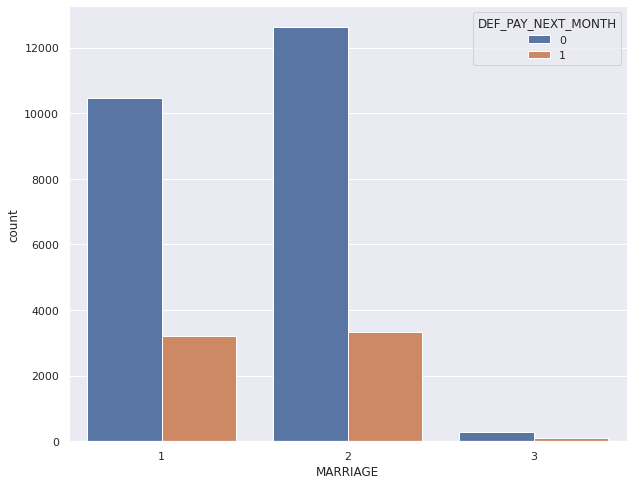

In [774]:
# 1. Graphical Visualization
plt.figure(figsize=(10,8))
sns.countplot(x=data['MARRIAGE'], hue=data['DEF_PAY_NEXT_MONTH'])

***People who are not married taking credits slightly higher than the married people.***

**EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)**

In [775]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [776]:
# Merge 5,6,0 classes to 4 class i.e., others
data['EDUCATION']=data['EDUCATION'].replace({5:4,6:4,0:4})
data['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<Axes: xlabel='EDUCATION', ylabel='count'>

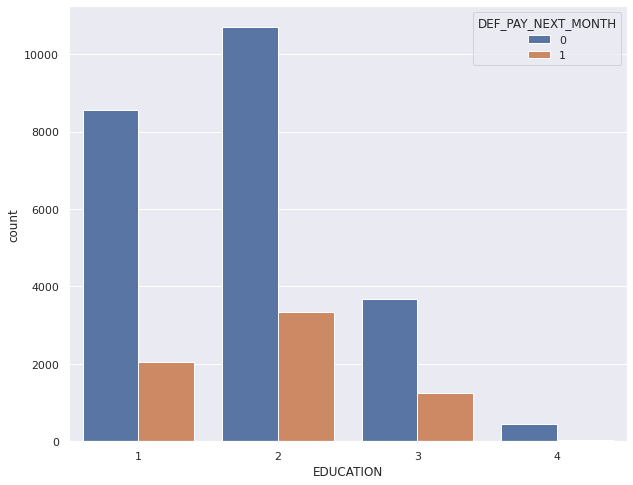

In [777]:
# 2. Graphical Visualization
plt.figure(figsize=(10,8))
sns.countplot(x=data['EDUCATION'], hue=data['DEF_PAY_NEXT_MONTH'])

***People studied at university is higher in using credit.***

**SEX: Gender (1=male, 2=female)**

In [778]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

<Axes: xlabel='SEX', ylabel='count'>

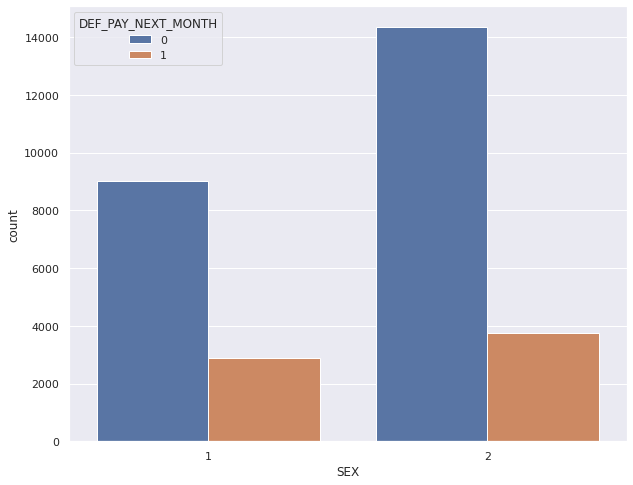

In [779]:
# 3. Graphical Visualization
plt.figure(figsize=(10,8))
sns.countplot(x=data['SEX'],hue=data['DEF_PAY_NEXT_MONTH'])

***Female count is higher than Male in taking credit card.***

**AGE: Age in years**

In [780]:
data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

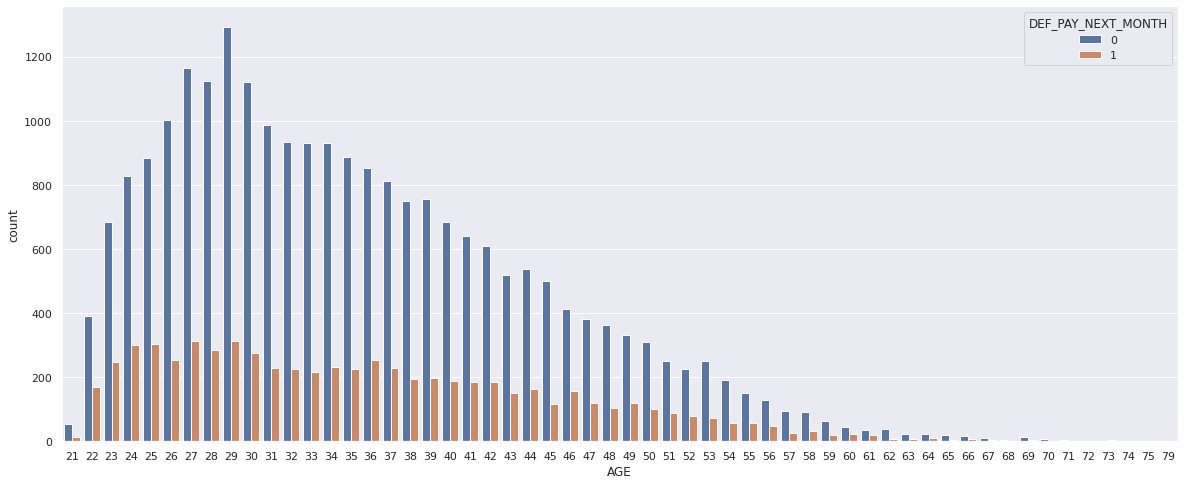

In [781]:
# 4. Graphical Visualization
plt.figure(figsize=(20,8))
sns.countplot(x=data['AGE'], hue=data['DEF_PAY_NEXT_MONTH'])

***People between the age of 24 and 40 are taking credit.
After the age 60, almost there is no record of using credit.***

**Handling Target Variable:**

**DEFAULT PAYMENT NEXT MONTH : Default payment (1=yes, 0=no)**

In [782]:
data['DEF_PAY_NEXT_MONTH'].value_counts(normalize=True) *100

0    77.88
1    22.12
Name: DEF_PAY_NEXT_MONTH, dtype: float64

In [783]:
pie_chart=data['DEF_PAY_NEXT_MONTH'].value_counts()
pie_chart

0    23364
1     6636
Name: DEF_PAY_NEXT_MONTH, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd91f659c40>,
 [Text(-0.8449152390547129, 0.704356613380692, 'No'),
  Text(0.844915272028025, -0.7043565738273541, 'Yes')])

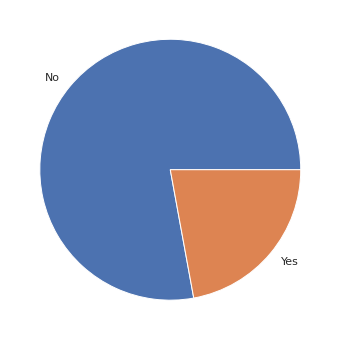

In [784]:
# 5. Graphical Visualization
fig,ax=plt.subplots(figsize=(6,6))
ax.pie(pie_chart,labels=('No','Yes'))

***77.88 % people are not the defaulters of credit card. 22.12 % (6636 out of 30000) people are the defaulters.***

**Handling Nemrical Variables:**


In [785]:
# 6. Graphical Visualization

**Bill Amount : Amount of bill statement (NT Dollars)**

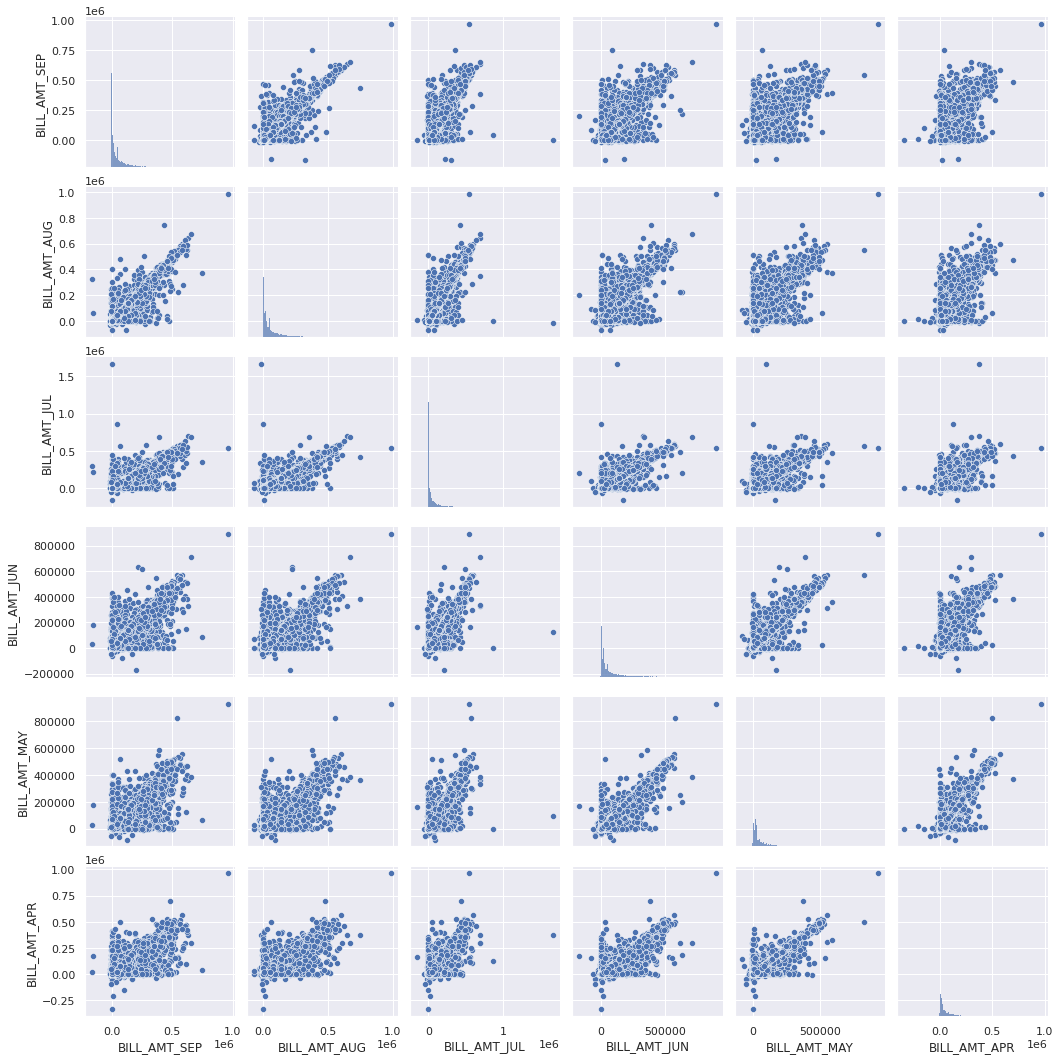

In [786]:
# Plotting pair wise relationship of Bill amount
sns.pairplot(data[['BILL_AMT_SEP','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR']])


***Here, We can correletion among many pairs. It seems that Multicollinearity exists.***

**Payment Amount: Amount of previous payment (NT Dollars)**

In [787]:
## Plotting pair wise relationship of Payment amount
pay_amt_df = data[['PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR','DEF_PAY_NEXT_MONTH']]


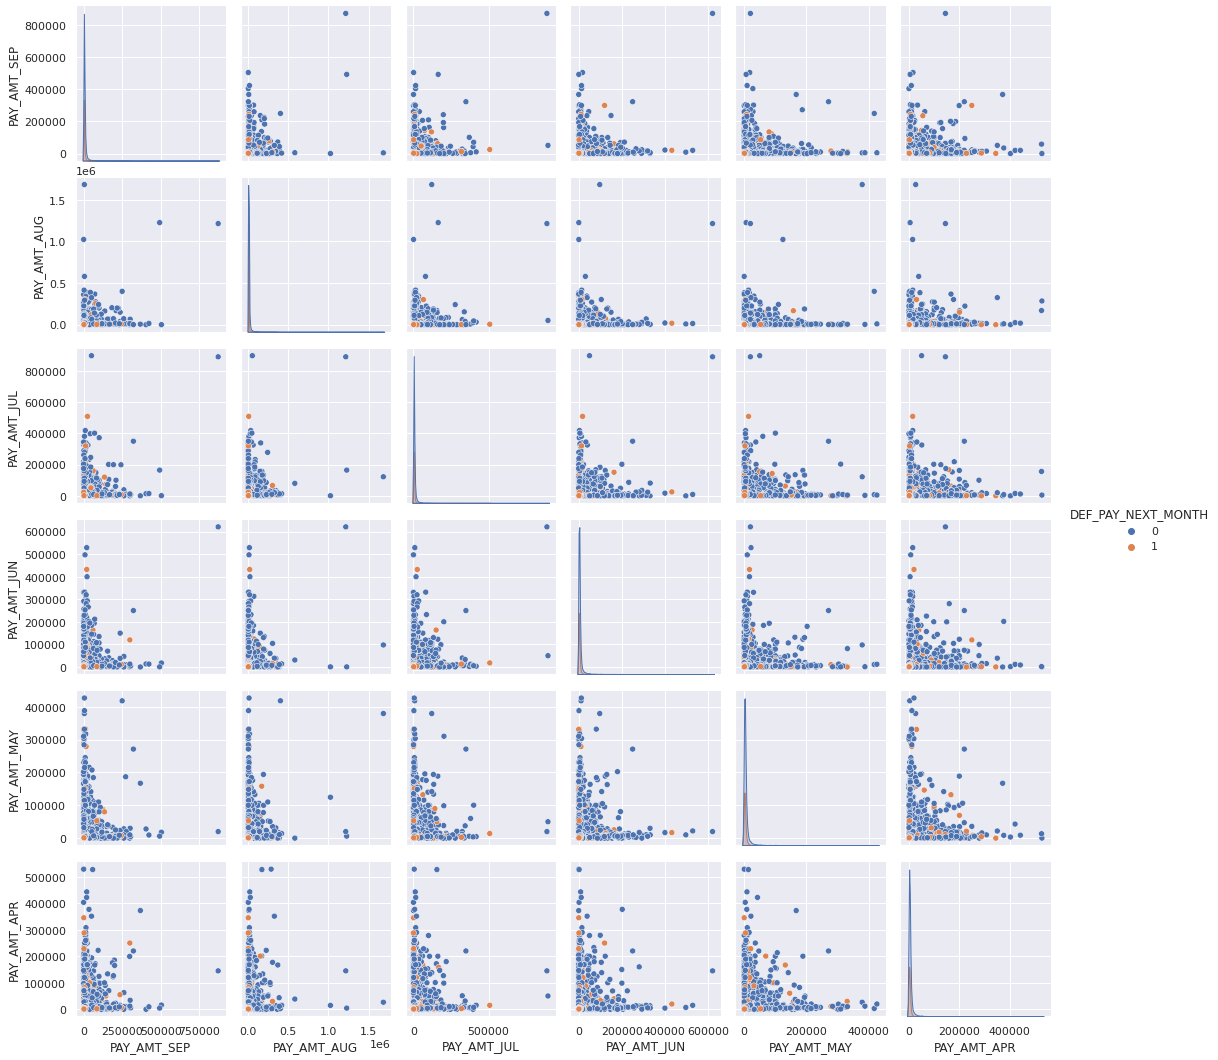

In [788]:
sns.pairplot(data= pay_amt_df, hue='DEF_PAY_NEXT_MONTH')

**PAY_MONTH : Repayment status in September, 2005 (-2= No Consumption, -1=pay duly, 0= paid minimum & revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 9=payment delay for nine months and above)**

**0= User revolving the credit i.e., paid minimum and credit automatically getting repeated.**


**DEFAULT PAYMENT NEXT MONTH : Default payment (1=yes, 0=no)**

In [789]:
Pay_Status = ['PAY_SEP','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

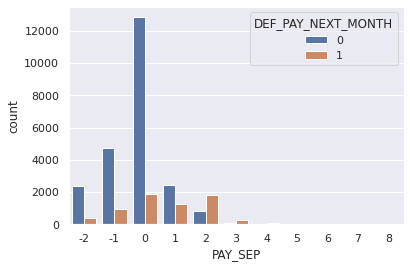

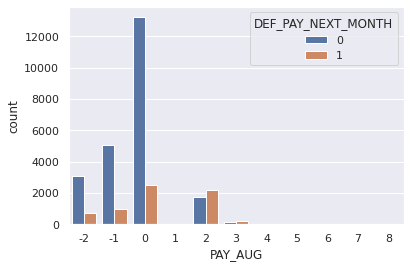

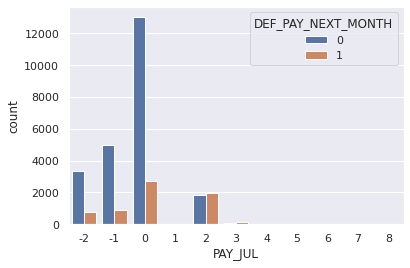

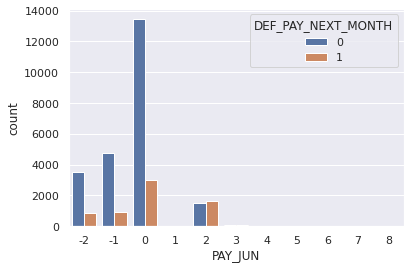

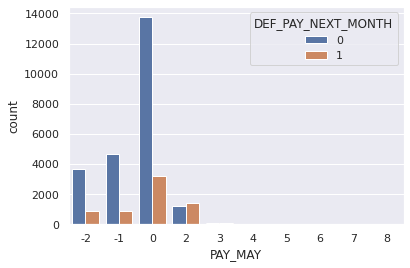

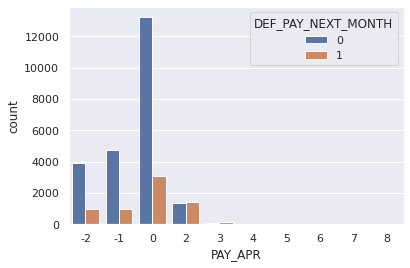

In [790]:
for i in Pay_Status:
  sns.countplot(x=data[i], hue= data['DEF_PAY_NEXT_MONTH'])
  plt.show()

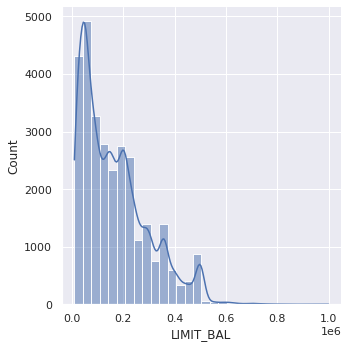

In [791]:
sns.displot(data['LIMIT_BAL'],kde=True, bins=30)

**Compare with DEF PAY NEXT MONTH**

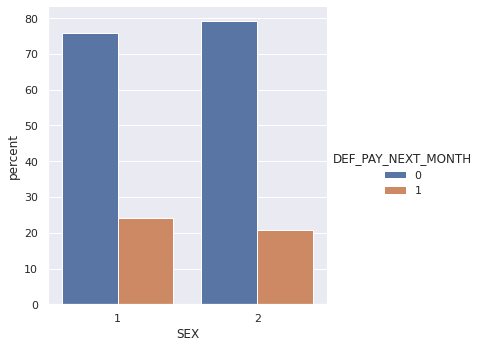

In [792]:
# Plot between SEX and 'DEF_PAY_NEXT_MONTH'
x,y = 'SEX', 'DEF_PAY_NEXT_MONTH'
data.groupby([x])[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot, 'data'),x=x,y='percent', hue=y, kind='bar')

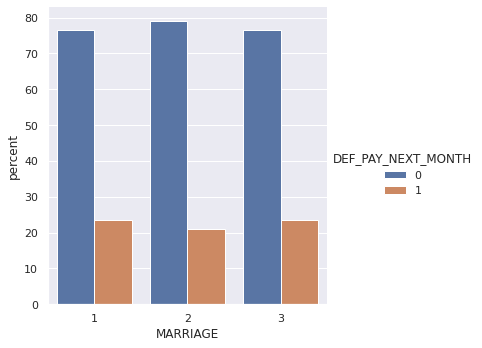

In [793]:
# Plot between Marriage and 'DEF_PAY_NEXT_MONTH'
x,y = 'MARRIAGE', 'DEF_PAY_NEXT_MONTH'
data.groupby([x])[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot, 'data'),x=x,y='percent', hue=y, kind='bar')

<Axes: xlabel='AGE', ylabel='LIMIT_BAL'>

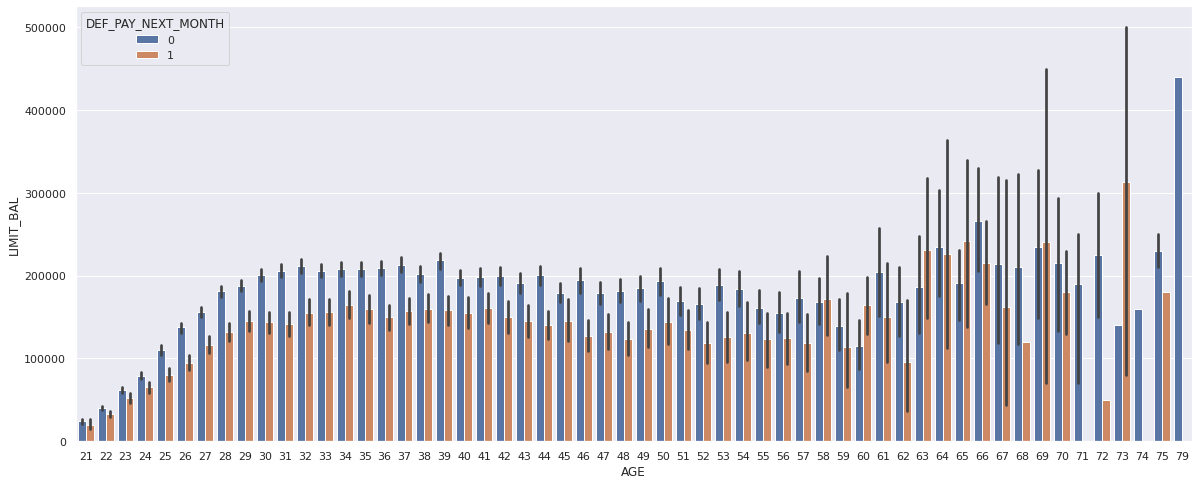

In [794]:
#Plot between Age and 'DEF_PAY_NEXT_MONTH'
plt.figure(figsize=(20,8))
sns.barplot(x=data['AGE'], y= data['LIMIT_BAL'], hue=data['DEF_PAY_NEXT_MONTH'])

<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

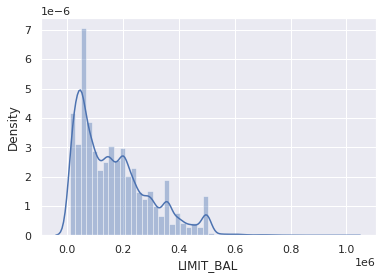

In [795]:
sns.distplot(data['LIMIT_BAL'])

In [796]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'DEF_PAY_NEXT_MONTH'],
      dtype='object')

# **Feature Engineering**

In [797]:
# Creating list Independant Columns for Outlier Detection
ind_cols=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

# **Outlier Treatment**

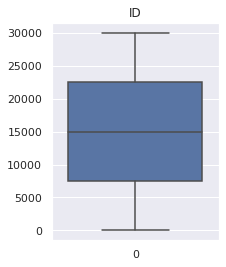

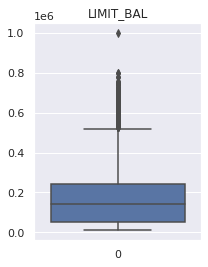

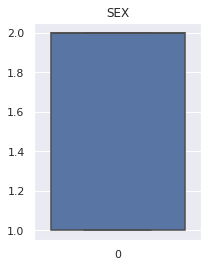

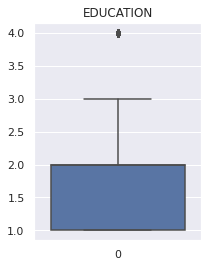

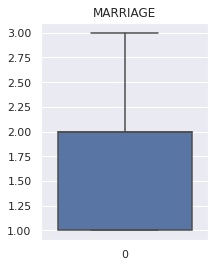

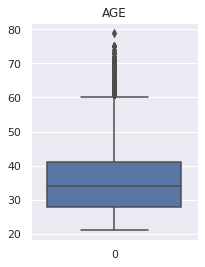

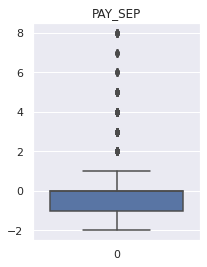

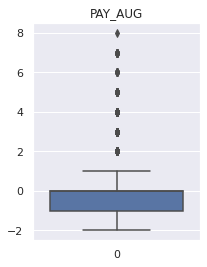

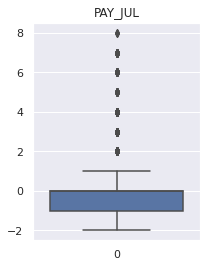

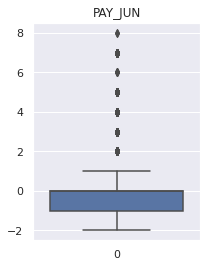

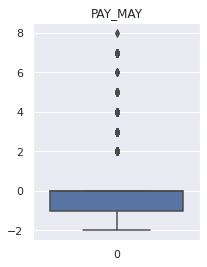

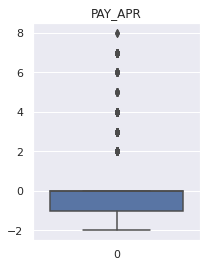

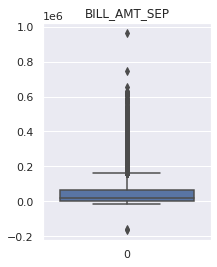

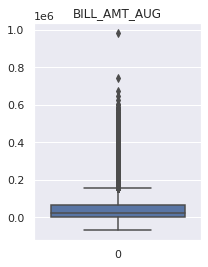

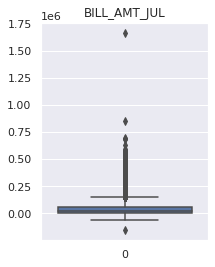

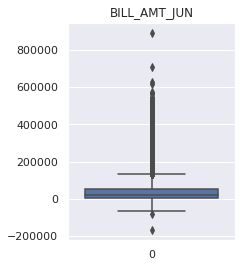

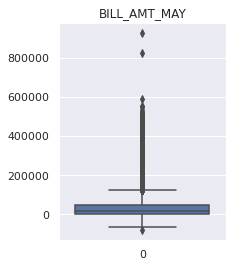

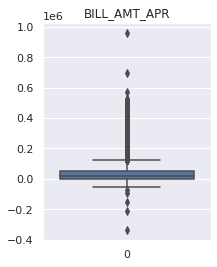

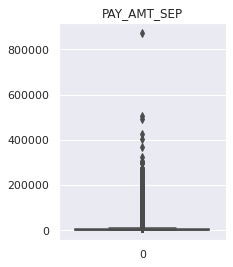

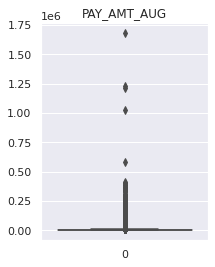

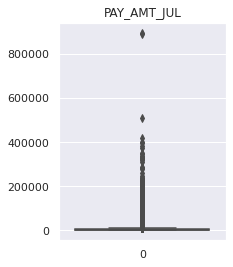

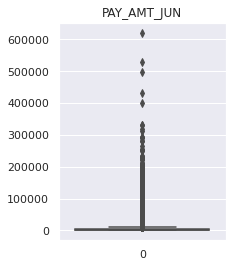

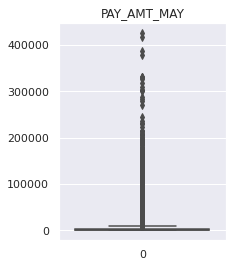

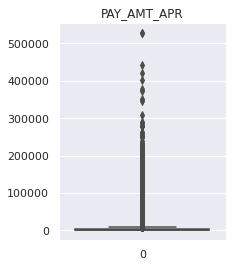

In [798]:
# Creating Boxplots using For Loop
for i in ind_cols:
  plt.subplots(figsize=(3,4))
  sns.boxplot(data[i])
  plt.title(i)

**Treating AGE Column**

In [799]:
data=data[data['AGE'] <61]

**Treating Payment Columns**

In [800]:
data= data[(data.PAY_APR<2) & (data.PAY_MAY<2) & (data.PAY_JUN<2) & (data.PAY_JUL<2) & (data.PAY_AUG < 2) & (data.PAY_SEP <2)]

**Treating Credit Limit Column using Z Score**

In [801]:
data['Z_LIMIT_BAL'] = np.abs(stats.zscore(data['LIMIT_BAL']))
data= data[data['Z_LIMIT_BAL'] <3]
data= data.drop('Z_LIMIT_BAL', axis=1)

In [802]:
# Reset the index as few rows of the dataset are removed during outlier removal
data=data.reset_index(drop=True)

**Creating Boxplots using For Loop after Outlier Treatment**

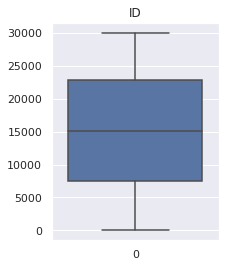

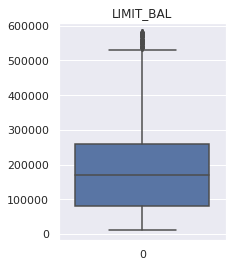

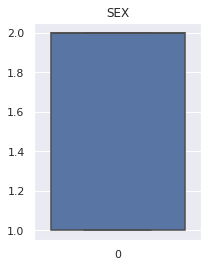

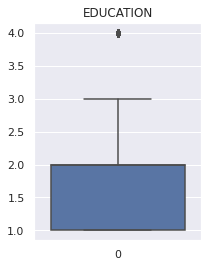

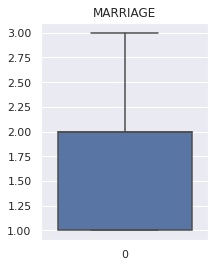

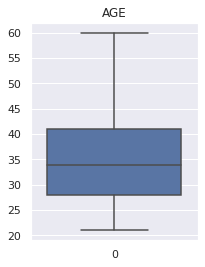

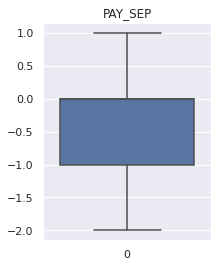

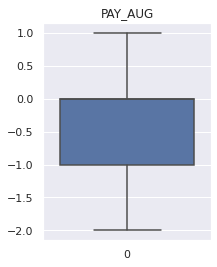

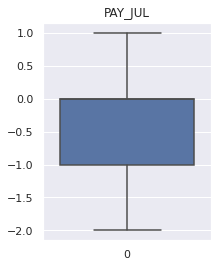

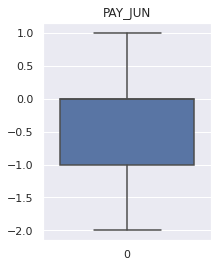

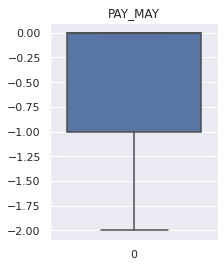

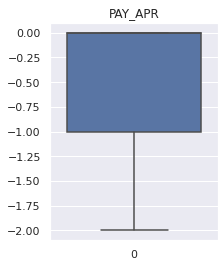

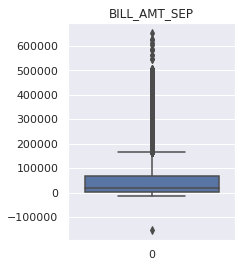

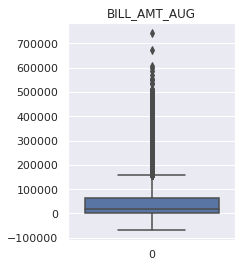

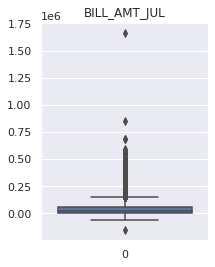

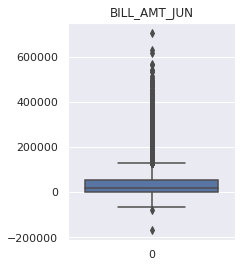

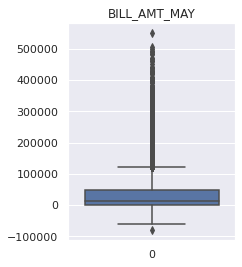

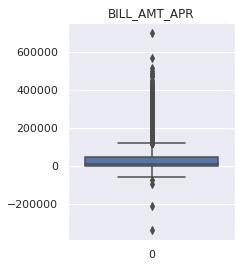

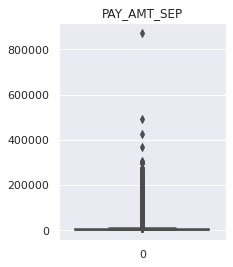

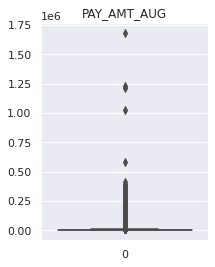

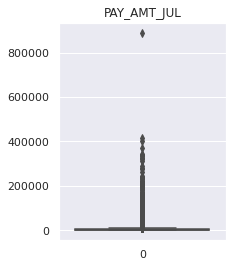

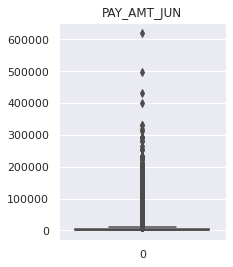

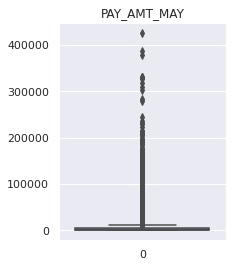

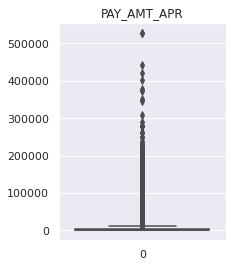

In [803]:
for i in ind_cols:
  plt.subplots(figsize=(3,4))
  sns.boxplot(data[i])
  plt.title(i)

# **Correlation Check:**

<Axes: >

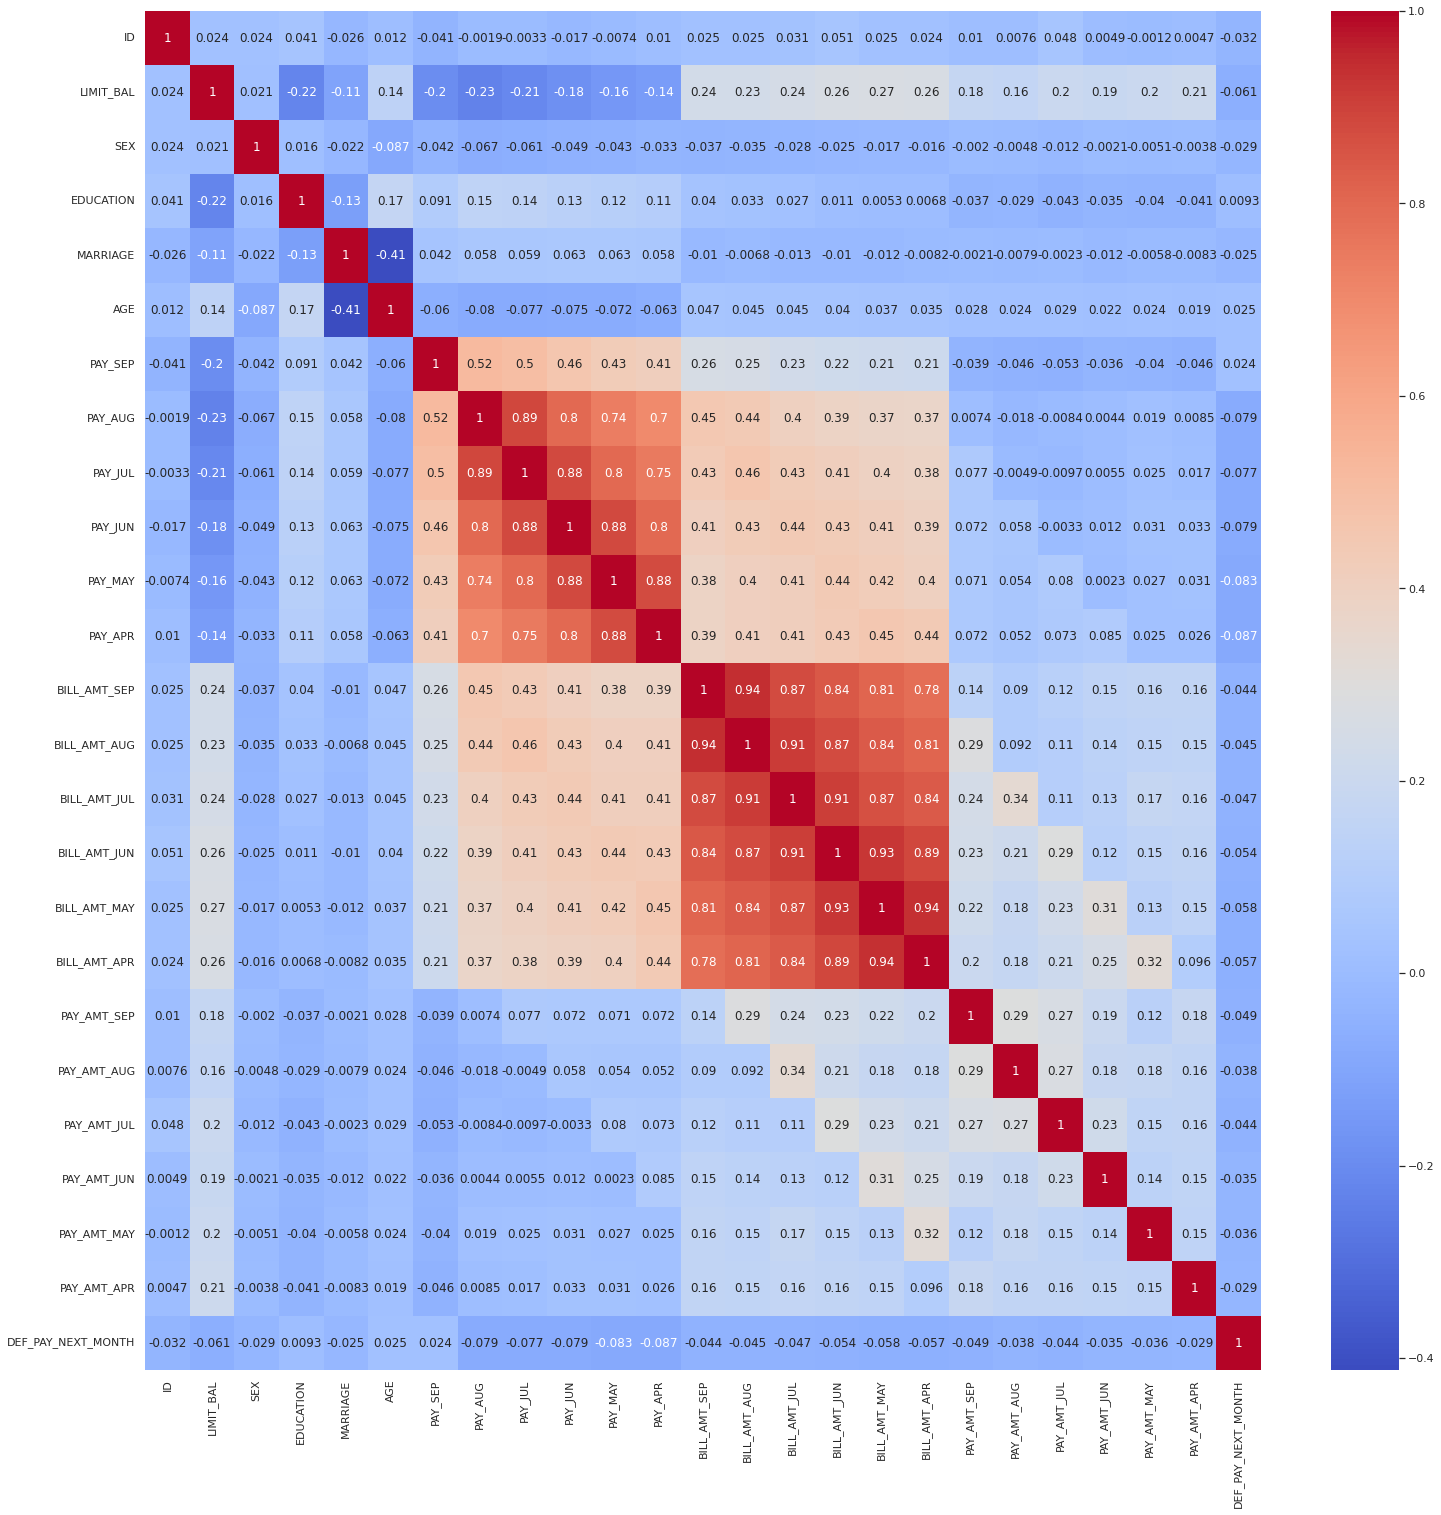

In [804]:
# Plotting Heatmap to observe Correlation among Features.
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

**There are few negative values, ID column has no impact in modelling, we can remove the ID Column.**

In [805]:
# Dropping Columns
data=data.drop(['ID'], axis=1)

In [806]:
#Reset Index of DataFrame, after outlier removal as few rows of observations are removed.
data=data.reset_index(drop=True)

In [807]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21341 entries, 0 to 21340
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   LIMIT_BAL           21341 non-null  int64
 1   SEX                 21341 non-null  int64
 2   EDUCATION           21341 non-null  int64
 3   MARRIAGE            21341 non-null  int64
 4   AGE                 21341 non-null  int64
 5   PAY_SEP             21341 non-null  int64
 6   PAY_AUG             21341 non-null  int64
 7   PAY_JUL             21341 non-null  int64
 8   PAY_JUN             21341 non-null  int64
 9   PAY_MAY             21341 non-null  int64
 10  PAY_APR             21341 non-null  int64
 11  BILL_AMT_SEP        21341 non-null  int64
 12  BILL_AMT_AUG        21341 non-null  int64
 13  BILL_AMT_JUL        21341 non-null  int64
 14  BILL_AMT_JUN        21341 non-null  int64
 15  BILL_AMT_MAY        21341 non-null  int64
 16  BILL_AMT_APR        21341 non-null  int6

# **One Hot Encoding:**

In [808]:
# Creating Dummy Classes of each class in variables.
data= pd.get_dummies(columns=['MARRIAGE','EDUCATION'],data=data, drop_first=True)

In [809]:
data

,LIMIT_BAL,SEX,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,...,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEF_PAY_NEXT_MONTH,MARRIAGE_2,MARRIAGE_3,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,1,0,1,0,0
1,50000,2,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,0,1,0,0
2,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,0,0,1,0,0
3,50000,1,37,0,0,0,0,0,0,64400,...,657,1000,1000,800,0,1,0,0,0,0
4,500000,1,29,0,0,0,0,0,0,367965,...,38000,20239,13750,13770,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,100000,1,38,0,-1,-1,0,0,0,3042,...,4000,3000,2000,2000,0,1,0,0,0,0
21337,220000,1,39,0,0,0,0,0,0,188948,...,5003,3047,5000,1000,0,0,0,0,1,0
21338,150000,1,43,-1,-1,-1,-1,0,0,1683,...,8998,129,0,0,0,1,0,0,1,0
21339,80000,1,41,1,-1,0,0,0,-1,-1645,...,1178,1926,52964,1804,1,0,0,0,1,0


# **Pre Processing**

In [628]:
# Creating Input Variable as x:
x= data.drop(['DEF_PAY_NEXT_MONTH'], axis=1)

In [629]:
# Creating Target Variable as y:
y=data['DEF_PAY_NEXT_MONTH']

In [630]:
y.value_counts()

0    18629
1     2712
Name: DEF_PAY_NEXT_MONTH, dtype: int64

<Axes: xlabel='DEF_PAY_NEXT_MONTH', ylabel='count'>

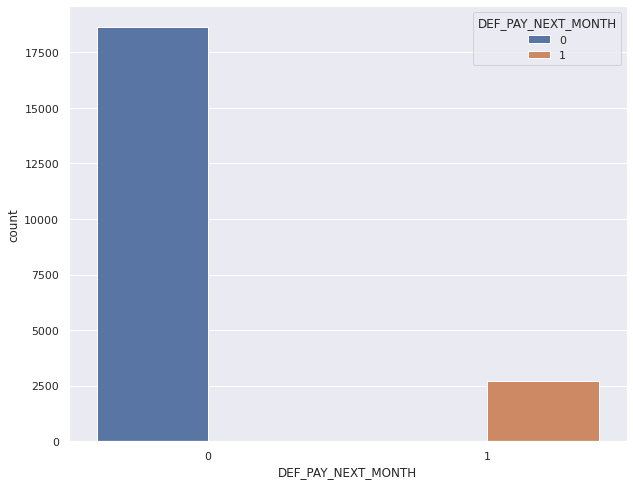

In [631]:
# Plotting Distribution of Target Variable over the Data Set
plt.figure(figsize=(10,8))
sns.countplot(x=y, hue=y)


***Here is the imbance of data, Target variable classes are not in a proportion.
This should be transormed to equal proportion by SMOTE.***

# **SMOTE**

**If the ouput classes in dataset are not in proportion, That will result poor in evaluating metrics of the model.**
**For this purpose, we use SMOTE(Synthetic Minority Oversampling Technique).**

In [620]:
# Using Module SMOTE
smote =SMOTE()

In [621]:
# Fit the SMOTE() to the x,y data
x_smote, y_smote = SMOTE().fit_resample(x,y)

In [622]:
#Verify y variable 
y_smote.value_counts()

0    18629
1    18629
Name: DEF_PAY_NEXT_MONTH, dtype: int64

<Axes: xlabel='DEF_PAY_NEXT_MONTH', ylabel='count'>

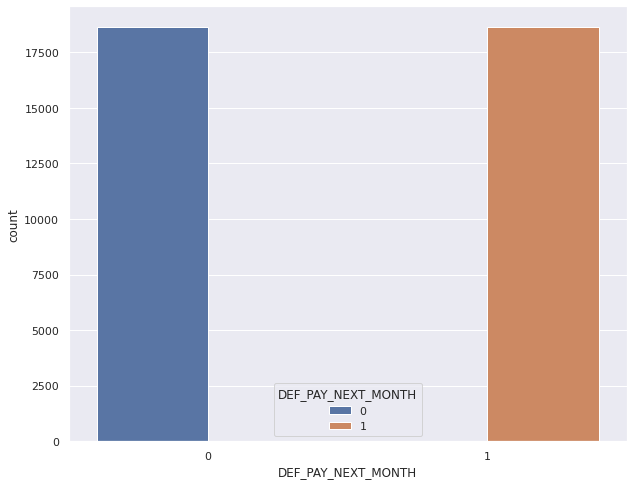

In [632]:
# Visualizing y variable after SMOTE
plt.figure(figsize=(10,8))
sns.countplot(x=y_smote, hue=y_smote)


In [633]:
# Extracting Modelling Dataset Size
x_smote.shape

(37258, 26)

***Now, The Imbalanced data issue is resolved.***

***After applying SMOTE, the size of modelling dataset is 37258 rows and 16 columns.***

# **Feature Scalling**

In [634]:
# Renaming SMOTE Variables for Modelling as X as input and Y as output
X= x_smote
Y= y_smote

In [635]:
# Transforming Data using Standarad Scaler()
scaler=StandardScaler()

In [636]:
scaler.fit_transform(X)

array([[-0.68195134,  1.00037583, -0.17831342, ...,  1.32667114,
        -0.33135159, -0.10600266],
       [-0.99580006,  1.00037583,  0.18833125, ...,  1.32667114,
        -0.33135159, -0.10600266],
       [-0.99580006, -0.99962431,  2.63262902, ...,  1.32667114,
        -0.33135159, -0.10600266],
       ...,
       [-0.99580006, -0.99962431,  1.04383547, ..., -0.75376631,
        -0.33135159, -0.10600266],
       [-0.76041352,  1.00037583, -1.03381764, ..., -0.75376631,
        -0.33135159, -0.10600266],
       [ 1.34174522, -0.99962431,  0.43276102, ..., -0.75376631,
        -0.33135159, -0.10600266]])

# **Creating Train-Test-Split**

In [637]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size=0.25, random_state=42)

In [638]:
X_train.shape ,X_test.shape, Y_train.shape ,Y_test.shape

((27943, 26), (9315, 26), (27943,), (9315,))

# **Modelling, Tuning & Evaluation**



# **1. Logistic Regression**

# **1.1 Tuning the Parameters**

In [639]:
#Creating Model Estimator for Tuning
Model1= LogisticRegression()

In [640]:
#Mentioning Logistic Regression parameters for Tuning
parameters= ({'penalty':['l1','l2','elasticnet','none'], 'C':list(np.linspace(0,1,10)), 'max_iter': list(range(40,300,50)) })

In [641]:
Model1_Grid= GridSearchCV(Model1, parameters,n_jobs=1,scoring='precision',verbose=3)

In [642]:
Model1_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END ......C=0.0, max_iter=40, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ......C=0.0, max_iter=40, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ......C=0.0, max_iter=40, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ......C=0.0, max_iter=40, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ......C=0.0, max_iter=40, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ......C=0.0, max_iter=40, penalty=l2;, score=nan total time=   0.0s
[CV 2/5] END ......C=0.0, max_iter=40, penalty=l2;, score=nan total time=   0.0s
[CV 3/5] END ......C=0.0, max_iter=40, penalty=l2;, score=nan total time=   0.0s
[CV 4/5] END ......C=0.0, max_iter=40, penalty=l2;, score=nan total time=   0.0s
[CV 5/5] END ......C=0.0, max_iter=40, penalty=l2;, score=nan total time=   0.0s
[CV 1/5] END C=0.0, max_iter=40, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=0.0, max_iter=40, penalty=el

GridSearchCV(estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.0, 0.1111111111111111, 0.2222222222222222,
                               0.3333333333333333, 0.4444444444444444,
                               0.5555555555555556, 0.6666666666666666,
                               0.7777777777777777, 0.8888888888888888, 1.0],
                         'max_iter': [40, 90, 140, 190, 240, 290],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='precision', verbose=3)

In [643]:
Model1_Grid.best_params_

{'C': 0.5555555555555556, 'max_iter': 90, 'penalty': 'l2'}

In [644]:
Model1_Grid.best_score_

0.5996425252087992

In [646]:
# Implementing Optimal Parameters in Model
# Model1_Grid.best_score is 0.5996425252087992
# {'C': 0.5555555555555556, 'max_iter': 90, 'penalty': 'l2'}

Model1= LogisticRegression(C=0.5555555555555556, max_iter=90, penalty='l2')
Model1.fit(X_train,Y_train)

LogisticRegression(C=0.5555555555555556, max_iter=90)

In [647]:
# Predicting the model with Training and Testing Data
Y_train_predict=Model1.predict(X_train)
Y_test_predict=Model1.predict(X_test)

# **1.2 Model Evaluation:**

**Creating Confusion Matrix for Training and Testing Model**

[[9983 7863]
 [4024 6073]]


<Axes: >

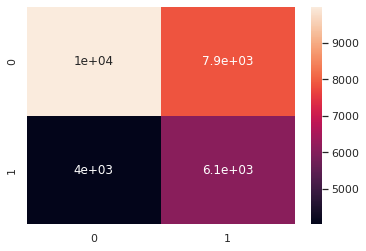

In [648]:
cmTrain1= confusion_matrix(Y_train_predict, Y_train)
print(cmTrain1)

#plotting Confusion Matrix
sns.heatmap(cmTrain1, annot=True)

[[3337 2644]
 [1285 2049]]


<Axes: >

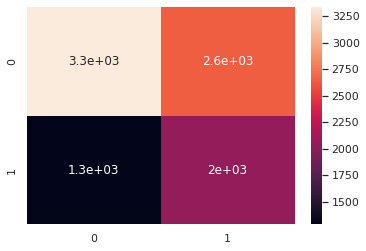

In [649]:
cmTest1= confusion_matrix(Y_test_predict, Y_test)
print(cmTest1)

#plotting Confusion Matrix
sns.heatmap(cmTest1, annot=True)

**Evaluating the Metrics of the model.**

In [650]:
# Printing Evaluation Metrics
Train_Accuracy =accuracy_score(Y_train_predict,Y_train)
print("Train_Accuracy: ",Train_Accuracy)

Test_Accuracy =accuracy_score(Y_test_predict,Y_test)
print("Test_Accuracy: ",Test_Accuracy)

Recall_Score =recall_score(Y_test_predict,Y_test)
print("Recall_Score: ",Recall_Score)

Precision_Score =precision_score(Y_test_predict,Y_test)
print("Precision_Score: ",Precision_Score)

AUC_ROC_Score =roc_auc_score(Y_test_predict,Y_test)
print("AUC_ROC_Score: ",AUC_ROC_Score)

F1_Score =f1_score(Y_test_predict,Y_test)
print("F1_Score :",F1_Score)


Train_Accuracy:  0.5745982893747987
Test_Accuracy:  0.5782071926999464
Recall_Score:  0.6145770845830834
Precision_Score:  0.43660771361602385
AUC_ROC_Score:  0.5862552702634527
F1_Score : 0.5105269714712845


In [651]:
Dict= {'Model': 'Logistic Regression',
       'Train_Accuracy': round(Train_Accuracy,3),
       'Test_Accuracy': round(Test_Accuracy,3),
       'Recall_Score' : round(Recall_Score,3),
       'Precision_Score':round(Precision_Score,3),
       'AUC_ROC_Score':round(AUC_ROC_Score,3),
       'F1_Score': round(F1_Score,3)}

In [652]:
Dict

{'Model': 'Logistic Regression',
 'Train_Accuracy': 0.575,
 'Test_Accuracy': 0.578,
 'Recall_Score': 0.615,
 'Precision_Score': 0.437,
 'AUC_ROC_Score': 0.586,
 'F1_Score': 0.511}

In [653]:
Eval_DF=pd.DataFrame(Dict, index=[1])

In [654]:
Eval_DF

,Model,Train_Accuracy,Test_Accuracy,Recall_Score,Precision_Score,AUC_ROC_Score,F1_Score
1,Logistic Regression,0.575,0.578,0.615,0.437,0.586,0.511


# **2. Support Vector Machines Classifier**

# **2.1 Tuning the Parameters**

In [655]:
#Creating Model Estimator for Tuning
Model2= SVC()

In [656]:
#Mentioning parameters for Tuning
parameters= ({'C':[0.1,1.0]})

In [657]:
Model2_Grid= GridSearchCV(Model2, parameters,n_jobs=1,scoring='precision',verbose=3)

In [662]:
Model2_Grid.fit(X_train,Y_train)

[CV 3/5] END .............................C=0.1;, score=0.561 total time=  37.6s
[CV 4/5] END .............................C=0.1;, score=0.575 total time=  35.3s
[CV 5/5] END .............................C=0.1;, score=0.576 total time=  35.8s
[CV 1/5] END .............................C=1.0;, score=0.585 total time=  33.9s
[CV 2/5] END .............................C=1.0;, score=0.587 total time=  34.3s
[CV 3/5] END .............................C=1.0;, score=0.583 total time=  34.5s
[CV 4/5] END .............................C=1.0;, score=0.586 total time=  32.6s
[CV 5/5] END .............................C=1.0;, score=0.591 total time=  34.4s


GridSearchCV(estimator=SVC(), n_jobs=1, param_grid={'C': [0.1, 1.0]},
             scoring='precision', verbose=3)

In [661]:
Model2_Grid.best_params_

{'C': 1.0}

In [663]:
Model2_Grid.best_score_

0.5866631985852175

In [666]:
# Implementing Optimal Parameters in Model
# Model2_Grid.best_score is 0.5866631985852175
#{'C': 1.0}

Model2= SVC(C=1.0)
Model2.fit(X_train,Y_train)

SVC()

In [667]:
# Predicting the model with Training and Testing Data
Y_train_predict=Model2.predict(X_train)
Y_test_predict=Model2.predict(X_test)

#**2.2 Model Evaluation:**

**Creating Confusion Matrix for Training and Testing Model**

[[ 6401  2908]
 [ 7606 11028]]


<Axes: >

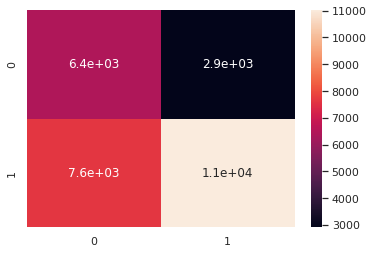

In [668]:
cmTrain2= confusion_matrix(Y_train_predict, Y_train)
print(cmTrain2)

#plotting Confusion Matrix
sns.heatmap(cmTrain2, annot=True)

[[2087 1004]
 [2535 3689]]


<Axes: >

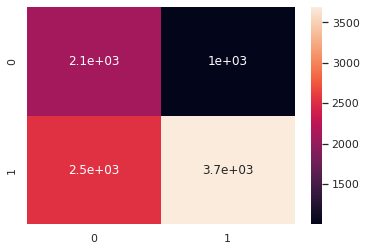

In [669]:
cmTest2= confusion_matrix(Y_test_predict, Y_test)
print(cmTest2)

#plotting Confusion Matrix
sns.heatmap(cmTest2, annot=True)

**Evaluating the Metrics of the model.**

In [670]:
# Printing Evaluation Metrics
Train_Accuracy =accuracy_score(Y_train_predict,Y_train)
print("Train_Accuracy: ",Train_Accuracy)

Test_Accuracy =accuracy_score(Y_test_predict,Y_test)
print("Test_Accuracy: ",Test_Accuracy)

Recall_Score =recall_score(Y_test_predict,Y_test)
print("Recall_Score: ",Recall_Score)

Precision_Score =precision_score(Y_test_predict,Y_test)
print("Precision_Score: ",Precision_Score)

AUC_ROC_Score =roc_auc_score(Y_test_predict,Y_test)
print("AUC_ROC_Score: ",AUC_ROC_Score)

F1_Score =f1_score(Y_test_predict,Y_test)
print("F1_Score :",F1_Score)


Train_Accuracy:  0.6237340299896217
Test_Accuracy:  0.6200751476113795
Recall_Score:  0.5927056555269923
Precision_Score:  0.786064351161304
AUC_ROC_Score:  0.6339458397337323
F1_Score : 0.6758266923147384


In [671]:
Dict= {'Model': 'SVC',
       'Train_Accuracy': round(Train_Accuracy,3),
       'Test_Accuracy': round(Test_Accuracy,3),
       'Recall_Score' : round(Recall_Score,3),
       'Precision_Score':round(Precision_Score,3),
       'AUC_ROC_Score':round(AUC_ROC_Score,3),
       'F1_Score': round(F1_Score,3)}

In [672]:
Dict

{'Model': 'SVC',
 'Train_Accuracy': 0.624,
 'Test_Accuracy': 0.62,
 'Recall_Score': 0.593,
 'Precision_Score': 0.786,
 'AUC_ROC_Score': 0.634,
 'F1_Score': 0.676}

In [673]:
Eval_DF=Eval_DF.append(Dict,ignore_index=True )
Eval_DF

,Model,Train_Accuracy,Test_Accuracy,Recall_Score,Precision_Score,AUC_ROC_Score,F1_Score
0,Logistic Regression,0.575,0.578,0.615,0.437,0.586,0.511
1,SVC,0.624,0.620,0.593,0.786,0.634,0.676


# **3. Random Forest**

# **3.1 Tuning the Parameters**

In [674]:
#Creating Model Estimator for Tuning
Model3= RandomForestClassifier()

In [675]:
#Mentioning parameters for Tuning
parameters= ({'min_samples_split': [2,5,10],'min_samples_leaf': [2,5,10] })

In [676]:
Model3_Grid= GridSearchCV(Model3, parameters,n_jobs=1,scoring='precision',verbose=3)

In [677]:
Model3_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END min_samples_leaf=2, min_samples_split=2;, score=0.869 total time=   6.2s
[CV 2/5] END min_samples_leaf=2, min_samples_split=2;, score=0.866 total time=   6.4s
[CV 3/5] END min_samples_leaf=2, min_samples_split=2;, score=0.867 total time=   9.4s
[CV 4/5] END min_samples_leaf=2, min_samples_split=2;, score=0.866 total time=   9.1s
[CV 5/5] END min_samples_leaf=2, min_samples_split=2;, score=0.863 total time=   6.5s
[CV 1/5] END min_samples_leaf=2, min_samples_split=5;, score=0.866 total time=   6.0s
[CV 2/5] END min_samples_leaf=2, min_samples_split=5;, score=0.867 total time=   6.5s
[CV 3/5] END min_samples_leaf=2, min_samples_split=5;, score=0.867 total time=   6.0s
[CV 4/5] END min_samples_leaf=2, min_samples_split=5;, score=0.867 total time=   6.5s
[CV 5/5] END min_samples_leaf=2, min_samples_split=5;, score=0.861 total time=   6.0s
[CV 1/5] END min_samples_leaf=2, min_samples_split=10;, score=0.864 total time= 

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='precision', verbose=3)

In [678]:
Model3_Grid.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2}

In [679]:
Model3_Grid.best_score_

0.8661239413440953

In [680]:
# Implementing Optimal Parameters in Model
# Model3_Grid.best_score is0.8661239413440953
# {'min_samples_leaf': 2, 'min_samples_split': 2}

Model3= RandomForestClassifier(min_samples_leaf=2,min_samples_split =2)
Model3.fit(X_train,Y_train)

RandomForestClassifier(min_samples_leaf=2)

In [681]:
# Predicting the model with Training and Testing Data
Y_train_predict=Model3.predict(X_train)
Y_test_predict=Model3.predict(X_test)

# **3.2 Model Evaluation:**

**Creating Confusion Matrix for Training and Testing Model**

[[13805   125]
 [  202 13811]]


<Axes: >

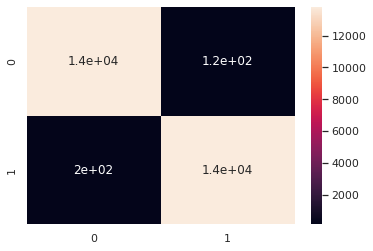

In [682]:
cmTrain3= confusion_matrix(Y_train_predict, Y_train)
print(cmTrain3)

#plotting Confusion Matrix
sns.heatmap(cmTrain3, annot=True)

[[4067  663]
 [ 555 4030]]


<Axes: >

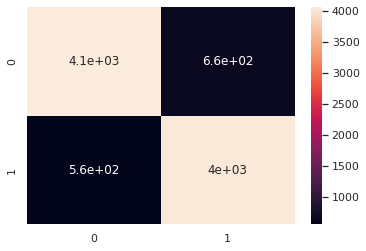

In [683]:
cmTest3= confusion_matrix(Y_test_predict, Y_test)
print(cmTest3)

#plotting Confusion Matrix
sns.heatmap(cmTest3, annot=True)

**Evaluating the Metrics of the model.**

In [684]:
# Printing Evaluation Metrics
Train_Accuracy =accuracy_score(Y_train_predict,Y_train)
print("Train_Accuracy: ",Train_Accuracy)

Test_Accuracy =accuracy_score(Y_test_predict,Y_test)
print("Test_Accuracy: ",Test_Accuracy)

Recall_Score =recall_score(Y_test_predict,Y_test)
print("Recall_Score: ",Recall_Score)

Precision_Score =precision_score(Y_test_predict,Y_test)
print("Precision_Score: ",Precision_Score)

AUC_ROC_Score =roc_auc_score(Y_test_predict,Y_test)
print("AUC_ROC_Score: ",AUC_ROC_Score)

F1_Score =f1_score(Y_test_predict,Y_test)
print("F1_Score :",F1_Score)


Train_Accuracy:  0.9882976058404609
Test_Accuracy:  0.869243156199678
Recall_Score:  0.8789531079607416
Precision_Score:  0.8587257617728532
AUC_ROC_Score:  0.8693919873841762
F1_Score : 0.8687217072644966


In [685]:
Dict= {'Model': 'Random Forest',
       'Train_Accuracy': round(Train_Accuracy,3),
       'Test_Accuracy': round(Test_Accuracy,3),
       'Recall_Score' : round(Recall_Score,3),
       'Precision_Score':round(Precision_Score,3),
       'AUC_ROC_Score':round(AUC_ROC_Score,3),
       'F1_Score': round(F1_Score,3)}

In [686]:
Dict

{'Model': 'Random Forest',
 'Train_Accuracy': 0.988,
 'Test_Accuracy': 0.869,
 'Recall_Score': 0.879,
 'Precision_Score': 0.859,
 'AUC_ROC_Score': 0.869,
 'F1_Score': 0.869}

In [687]:
Eval_DF=Eval_DF.append(Dict,ignore_index=True )
Eval_DF

,Model,Train_Accuracy,Test_Accuracy,Recall_Score,Precision_Score,AUC_ROC_Score,F1_Score
0,Logistic Regression,0.575,0.578,0.615,0.437,0.586,0.511
1,SVC,0.624,0.620,0.593,0.786,0.634,0.676
2,Random Forest,0.988,0.869,0.879,0.859,0.869,0.869


# **4. XG Boosting**

# **4.1 Tuning the Parameters**

In [688]:
#Creating Model Estimator for Tuning
Model4= xgb.XGBClassifier()

In [689]:
#Mentioning parameters for Tuning
parameters= ({'learning_rate': list(np.linspace(0,1,5)), 'max_depth':[2,5] })

In [690]:
Model4_Grid= GridSearchCV(Model4, parameters,n_jobs=1,scoring='precision',verbose=3)

In [691]:
Model4_Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....learning_rate=0.0, max_depth=2;, score=0.000 total time=   1.4s
[CV 2/5] END ....learning_rate=0.0, max_depth=2;, score=0.000 total time=   1.4s
[CV 3/5] END ....learning_rate=0.0, max_depth=2;, score=0.000 total time=   1.4s
[CV 4/5] END ....learning_rate=0.0, max_depth=2;, score=0.000 total time=   1.4s
[CV 5/5] END ....learning_rate=0.0, max_depth=2;, score=0.000 total time=   1.4s
[CV 1/5] END ....learning_rate=0.0, max_depth=5;, score=0.000 total time=   5.7s
[CV 2/5] END ....learning_rate=0.0, max_depth=5;, score=0.000 total time=   6.8s
[CV 3/5] END ....learning_rate=0.0, max_depth=5;, score=0.000 total time=  14.1s
[CV 4/5] END ....learning_rate=0.0, max_depth=5;, score=0.000 total time=   7.0s
[CV 5/5] END ....learning_rate=0.0, max_depth=5;, score=0.000 total time=   3.8s
[CV 1/5] END ...learning_rate=0.25, max_depth=2;, score=0.780 total time=   1.4s
[CV 2/5] END ...learning_rate=0.25, max_depth=2;

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.0, 0.25, 0.5, 0.75, 1.0],
                         'max_depth': [2, 5]},
             scoring='precision', verbose=3)

In [692]:
Model4_Grid.best_params_

{'learning_rate': 0.5, 'max_depth': 5}

In [693]:
Model4_Grid.best_score_

0.8456589480515214

In [694]:
# Implementing Optimal Parameters in Model
# Model4_Grid.best_score is 0.8456589480515214
#{'learning_rate': 0.5, 'max_depth': 5}

Model4= xgb.XGBClassifier(learning_rate =0.5, max_depth= 5)
Model4.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [695]:
# Predicting the model with Training and Testing Data
Y_train_predict=Model4.predict(X_train)
Y_test_predict=Model4.predict(X_test)

# **4.2 Model Evaluation:**

**Creating Confusion Matrix for Training and Testing Model**

[[12916  1163]
 [ 1091 12773]]


<Axes: >

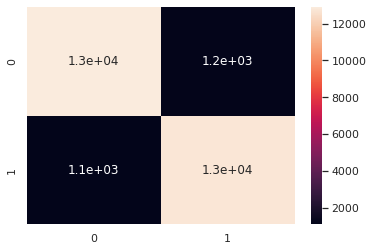

In [696]:
cmTrain4= confusion_matrix(Y_train_predict, Y_train)
print(cmTrain4)

#plotting Confusion Matrix
sns.heatmap(cmTrain4, annot=True)

[[3908  728]
 [ 714 3965]]


<Axes: >

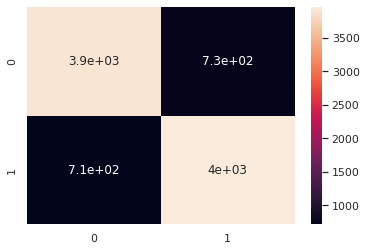

In [697]:
cmTest4= confusion_matrix(Y_test_predict, Y_test)
print(cmTest4)

#plotting Confusion Matrix
sns.heatmap(cmTest4, annot=True)

**Evaluating the Metrics of the model.**

In [698]:
# Printing Evaluation Metrics
Train_Accuracy =accuracy_score(Y_train_predict,Y_train)
print("Train_Accuracy: ",Train_Accuracy)

Test_Accuracy =accuracy_score(Y_test_predict,Y_test)
print("Test_Accuracy: ",Test_Accuracy)

Recall_Score =recall_score(Y_test_predict,Y_test)
print("Recall_Score: ",Recall_Score)

Precision_Score =precision_score(Y_test_predict,Y_test)
print("Precision_Score: ",Precision_Score)

AUC_ROC_Score =roc_auc_score(Y_test_predict,Y_test)
print("AUC_ROC_Score: ",AUC_ROC_Score)

F1_Score =f1_score(Y_test_predict,Y_test)
print("F1_Score :",F1_Score)


Train_Accuracy:  0.9193357907168164
Test_Accuracy:  0.8451959205582394
Recall_Score:  0.8474032913015601
Precision_Score:  0.8448753462603878
AUC_ROC_Score:  0.8451856836145419
F1_Score : 0.8461374306444729


In [699]:
Dict= {'Model': 'XG Boost',
       'Train_Accuracy': round(Train_Accuracy,3),
       'Test_Accuracy': round(Test_Accuracy,3),
       'Recall_Score' : round(Recall_Score,3),
       'Precision_Score':round(Precision_Score,3),
       'AUC_ROC_Score':round(AUC_ROC_Score,3),
       'F1_Score': round(F1_Score,3)}

In [700]:
Dict

{'Model': 'XG Boost',
 'Train_Accuracy': 0.919,
 'Test_Accuracy': 0.845,
 'Recall_Score': 0.847,
 'Precision_Score': 0.845,
 'AUC_ROC_Score': 0.845,
 'F1_Score': 0.846}

In [701]:
Eval_DF=Eval_DF.append(Dict,ignore_index=True )
Eval_DF

,Model,Train_Accuracy,Test_Accuracy,Recall_Score,Precision_Score,AUC_ROC_Score,F1_Score
0,Logistic Regression,0.575,0.578,0.615,0.437,0.586,0.511
1,SVC,0.624,0.620,0.593,0.786,0.634,0.676
2,Random Forest,0.988,0.869,0.879,0.859,0.869,0.869
3,XG Boost,0.919,0.845,0.847,0.845,0.845,0.846


# **Comparision of Metrics**

***All metrics can be available in one Data Frame.***

In [702]:
Eval_DF

,Model,Train_Accuracy,Test_Accuracy,Recall_Score,Precision_Score,AUC_ROC_Score,F1_Score
0,Logistic Regression,0.575,0.578,0.615,0.437,0.586,0.511
1,SVC,0.624,0.620,0.593,0.786,0.634,0.676
2,Random Forest,0.988,0.869,0.879,0.859,0.869,0.869
3,XG Boost,0.919,0.845,0.847,0.845,0.845,0.846


In [703]:
EVALUATION_DF = Eval_DF.copy()

In [704]:
EVALUATION_DF

,Model,Train_Accuracy,Test_Accuracy,Recall_Score,Precision_Score,AUC_ROC_Score,F1_Score
0,Logistic Regression,0.575,0.578,0.615,0.437,0.586,0.511
1,SVC,0.624,0.620,0.593,0.786,0.634,0.676
2,Random Forest,0.988,0.869,0.879,0.859,0.869,0.869
3,XG Boost,0.919,0.845,0.847,0.845,0.845,0.846



# **Model Explainability**

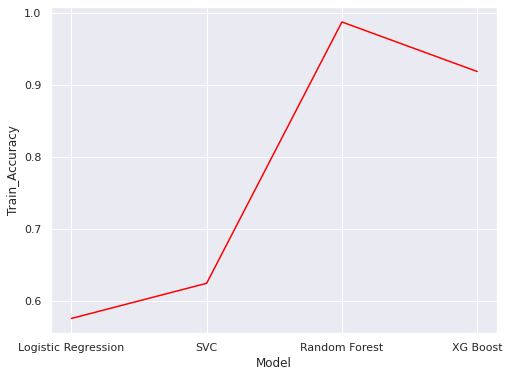

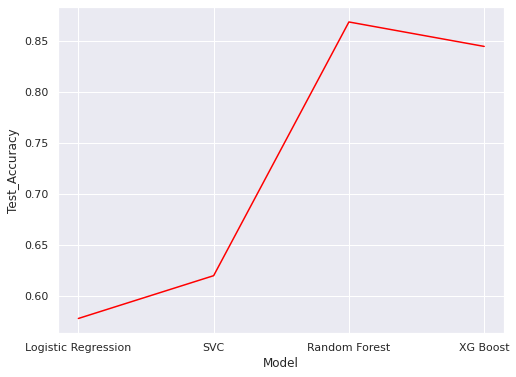

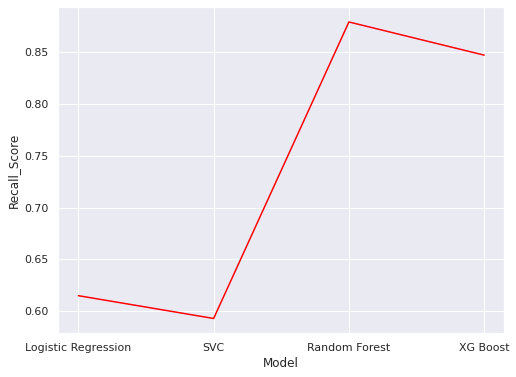

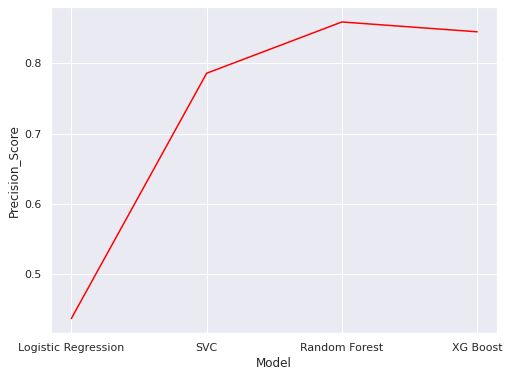

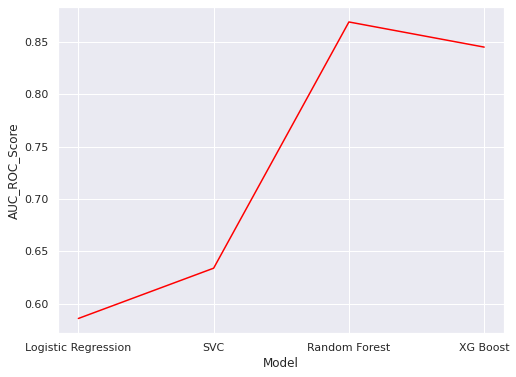

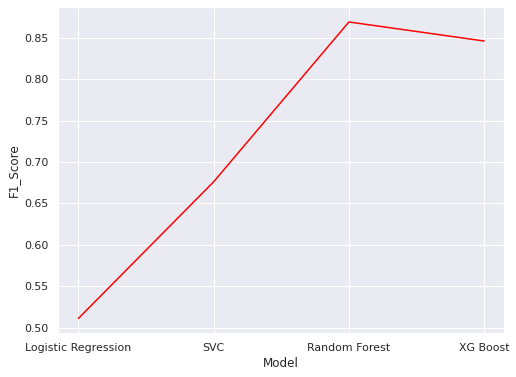

In [705]:
# Comparing Model Metrics
cols= ['Train_Accuracy',	'Test_Accuracy',	'Recall_Score',	'Precision_Score',	'AUC_ROC_Score',	'F1_Score']
for i in cols:
  plt.subplots(figsize=(8,6))
  sns.lineplot(x=EVALUATION_DF['Model'], y=EVALUATION_DF[i], color='red')


  # **Feature Importance**

**Feature Importance using Random Forest Model:**

In [706]:
# Making an array containing input features
features= np.array(list(x.columns))
features

array(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_SEP', 'PAY_AUG', 'PAY_JUL',
       'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEP', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEP', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'MARRIAGE_2', 'MARRIAGE_3',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4'], dtype='<U12')

In [707]:
# Extracting Feature Importance values for Random Forest Model 
Model3.feature_importances_

array([0.07136595, 0.05318265, 0.05255695, 0.02389635, 0.00674992,
       0.00728457, 0.00651198, 0.00611375, 0.00700496, 0.06547337,
       0.05393149, 0.04907563, 0.04931956, 0.04899132, 0.0456211 ,
       0.05806152, 0.05487612, 0.04971347, 0.05049242, 0.04614485,
       0.05291239, 0.06333068, 0.0015251 , 0.03660688, 0.03333336,
       0.00592367])

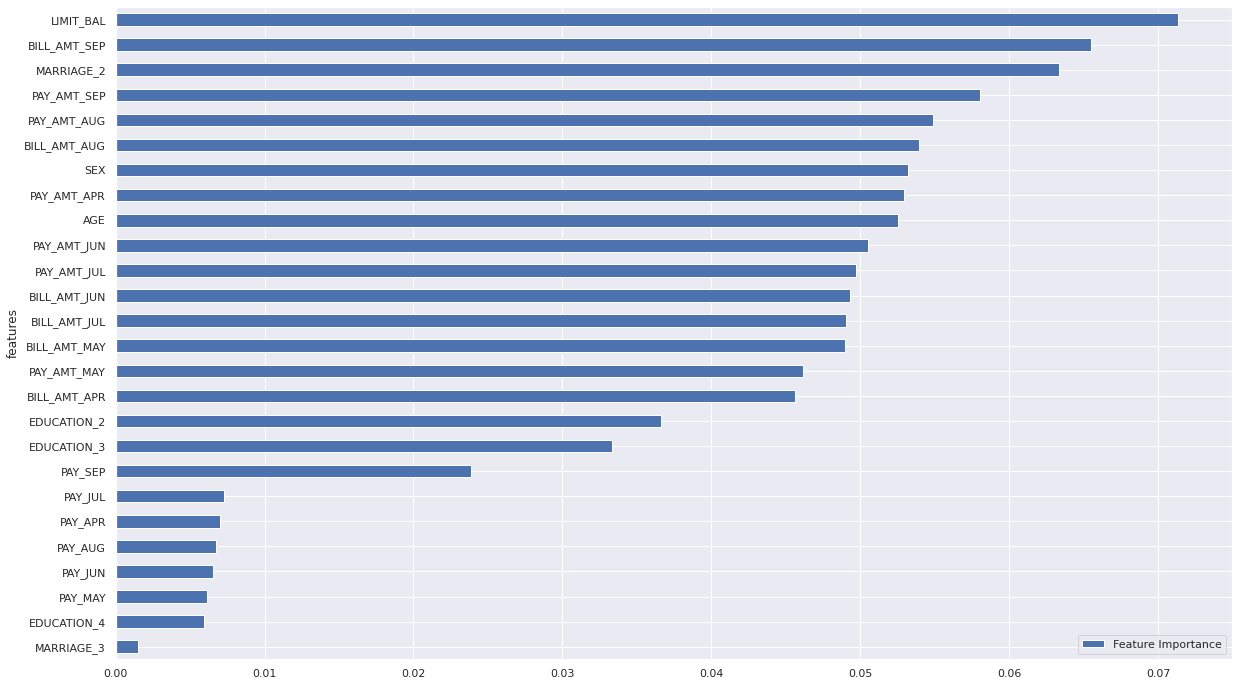

In [711]:
# Plotting Feature Importance from Random Forest Model
Fea_DF1=pd.DataFrame({'features':features, 'Feature Importance':Model3.feature_importances_})
Fea_DF1= Fea_DF1.sort_values(by='Feature Importance')
fig,ax= plt.subplots(1,1,figsize=(20,12))
Fea_DF1.plot.barh(x='features', y='Feature Importance', ax=ax)
plt.show()

***From Random Forest Model, The Columns 'LIMIT_BAL','BILL_AMT_SEP', 'MARRIAGE_2', 'PAY_AMT_SEP', 'PAY_AMT_AUG' & 'BILL_AMT_AUG'are the most important features for our Target Feature i.e., to check whether the user Defaulter or not.***


**Feature Importance using XG Boost Model:**

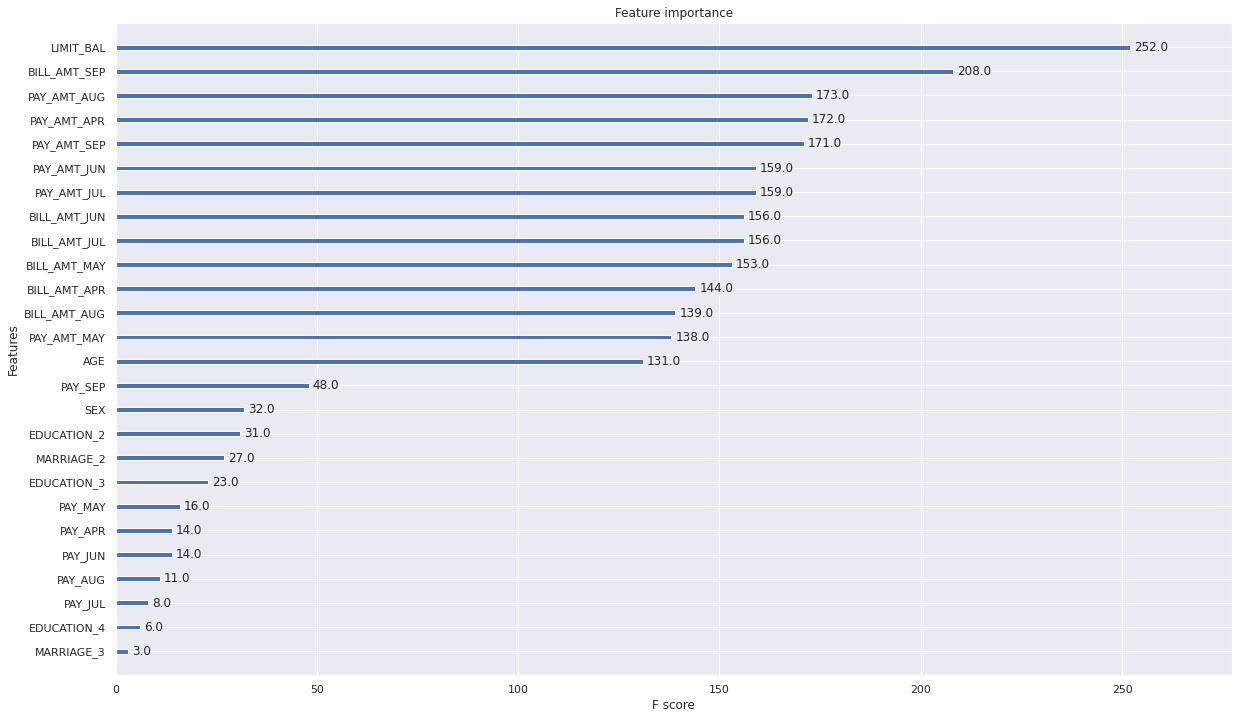

In [710]:
# Plotting Feature Importance from XG Boost Model
fig,ax= plt.subplots(1,1,figsize=(20,12))
plot_importance(Model4,ax=ax)
plt.show()

***From XG Boost Model, The Columns 'LIMIT_BAL','BILL_AMT_SEP' & 'PAY_AMT_AUG' are the most important features for our Target Feature i.e., to check whether the user Defaulter or not.***

# **Conclusion**

**EDA Outcomes:**

*   **People who are not married taking credits slightly higher than the married people**
*  **Age of most using og credit is in the range of 24 and 40. After the age 60, almost there is a declinebusing credit.**
*   **77.88 % people are not the defaulters of credit card. 22.12 % (6636 out of 30000) people are the defaulters.**
*   **Female count is higher than Male in taking credit card.**

**Challenges:**

* **Ouliers detected by Boxplot and Treated**
* **Imbalance of Data treated by SMOTE Approach**
* **Some Data not having proper explanation**
* **Removed Irrelavent classes in columns.**

**Model Outcomes:**


* **Among all the models, Random Forest Model given good results.**
*  **Random Forest Classifier & XG Boost given the best precision Score i.e. 85.9% & 84.5% respectively.**
* **Random Forest Classifier given the best recall Score i.e. 87.9%**
*  **The Columns 'LIMIT_BAL','BILL_AMT_SEP' & 'PAY_AMT_AUG' are the most important features for our Target Feature i.e., to check whether the user Defaulter or not.**

*  **In Overall, Random Forest Classifier best to fit on this data, But Execution of CrossValidation using GridSearchCV for hyper parameters takes long time.**










